In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
df_object = df.select_dtypes('object')
df_object

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No
...,...,...,...
395,Good,Yes,Yes
396,Medium,No,Yes
397,Medium,Yes,Yes
398,Bad,Yes,Yes


In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [12]:
df_object

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No
...,...,...,...
395,Good,Yes,Yes
396,Medium,No,Yes
397,Medium,Yes,Yes
398,Bad,Yes,Yes


In [13]:
from sklearn.preprocessing import LabelEncoder
for i in df_object:
  LE = LabelEncoder()
  df_object[i] = LE.fit_transform(df_object[i])

In [14]:
df_object

,ShelveLoc,Urban,US
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0
...,...,...,...
395,1,1,1
396,2,0,1
397,2,1,1
398,0,1,1


In [15]:
df_int = df.select_dtypes("int64")
df_float = df.select_dtypes("float")

In [16]:
df = pd.concat([df_object,df_int,df_float],axis = 1)

In [22]:
df.columns

Index(['ShelveLoc', 'Urban', 'US', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'Age', 'Education', 'Sales'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df2 = SS.fit_transform(df)

In [26]:
df2 = pd.DataFrame(df2, columns = [['ShelveLoc', 'Urban', 'US', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'Age', 'Education', 'Sales']])

In [27]:
df2

,ShelveLoc,Urban,US,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales
0,-1.570698,0.646869,0.741881,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,0.710376
1,-0.369399,0.646869,0.741881,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,1.320179
2,0.831899,0.646869,0.741881,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,0.908917
3,0.831899,0.646869,0.741881,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,-0.034151
4,-1.570698,0.646869,-1.347925,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,-1.186395
...,...,...,...,...,...,...,...,...,...,...,...
395,-0.369399,0.646869,0.741881,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208,1.798804
396,0.831899,-1.545908,0.741881,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033,-0.480867
397,0.831899,0.646869,0.741881,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529,-0.030605
398,-1.570698,0.646869,0.741881,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953,-0.551774


In [29]:
X = df2.iloc[:,:-1]
Y = df["Sales"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [33]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(280, 10) (120, 10) (280,) (120,)


In [34]:
from sklearn import tree
DTR = tree.DecisionTreeRegressor(max_depth = 5)
DTR1 = DTR.fit(X_train,Y_train)

In [35]:
DTR.score(X_train,Y_train)

0.7244580466583255

[Text(0.5, 0.9166666666666666, 'x[7] <= -0.901\nsquared_error = 7.665\nsamples = 280\nvalue = 7.356'),
 Text(0.25, 0.75, 'x[0] <= -0.97\nsquared_error = 5.765\nsamples = 46\nvalue = 9.804'),
 Text(0.125, 0.5833333333333334, 'x[3] <= -0.423\nsquared_error = 5.553\nsamples = 11\nvalue = 7.682'),
 Text(0.0625, 0.4166666666666667, 'x[4] <= -0.989\nsquared_error = 2.686\nsamples = 7\nvalue = 6.404'),
 Text(0.03125, 0.25, 'x[8] <= 0.66\nsquared_error = 0.226\nsamples = 2\nvalue = 3.945'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 4.42'),
 Text(0.046875, 0.08333333333333333, 'squared_error = -0.0\nsamples = 1\nvalue = 3.47'),
 Text(0.09375, 0.25, 'x[6] <= 0.106\nsquared_error = 0.283\nsamples = 5\nvalue = 7.388'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 0.014\nsamples = 2\nvalue = 6.76'),
 Text(0.109375, 0.08333333333333333, 'squared_error = 0.024\nsamples = 3\nvalue = 7.807'),
 Text(0.1875, 0.4166666666666667, 'x[5] <= -0.246\nsquared_error

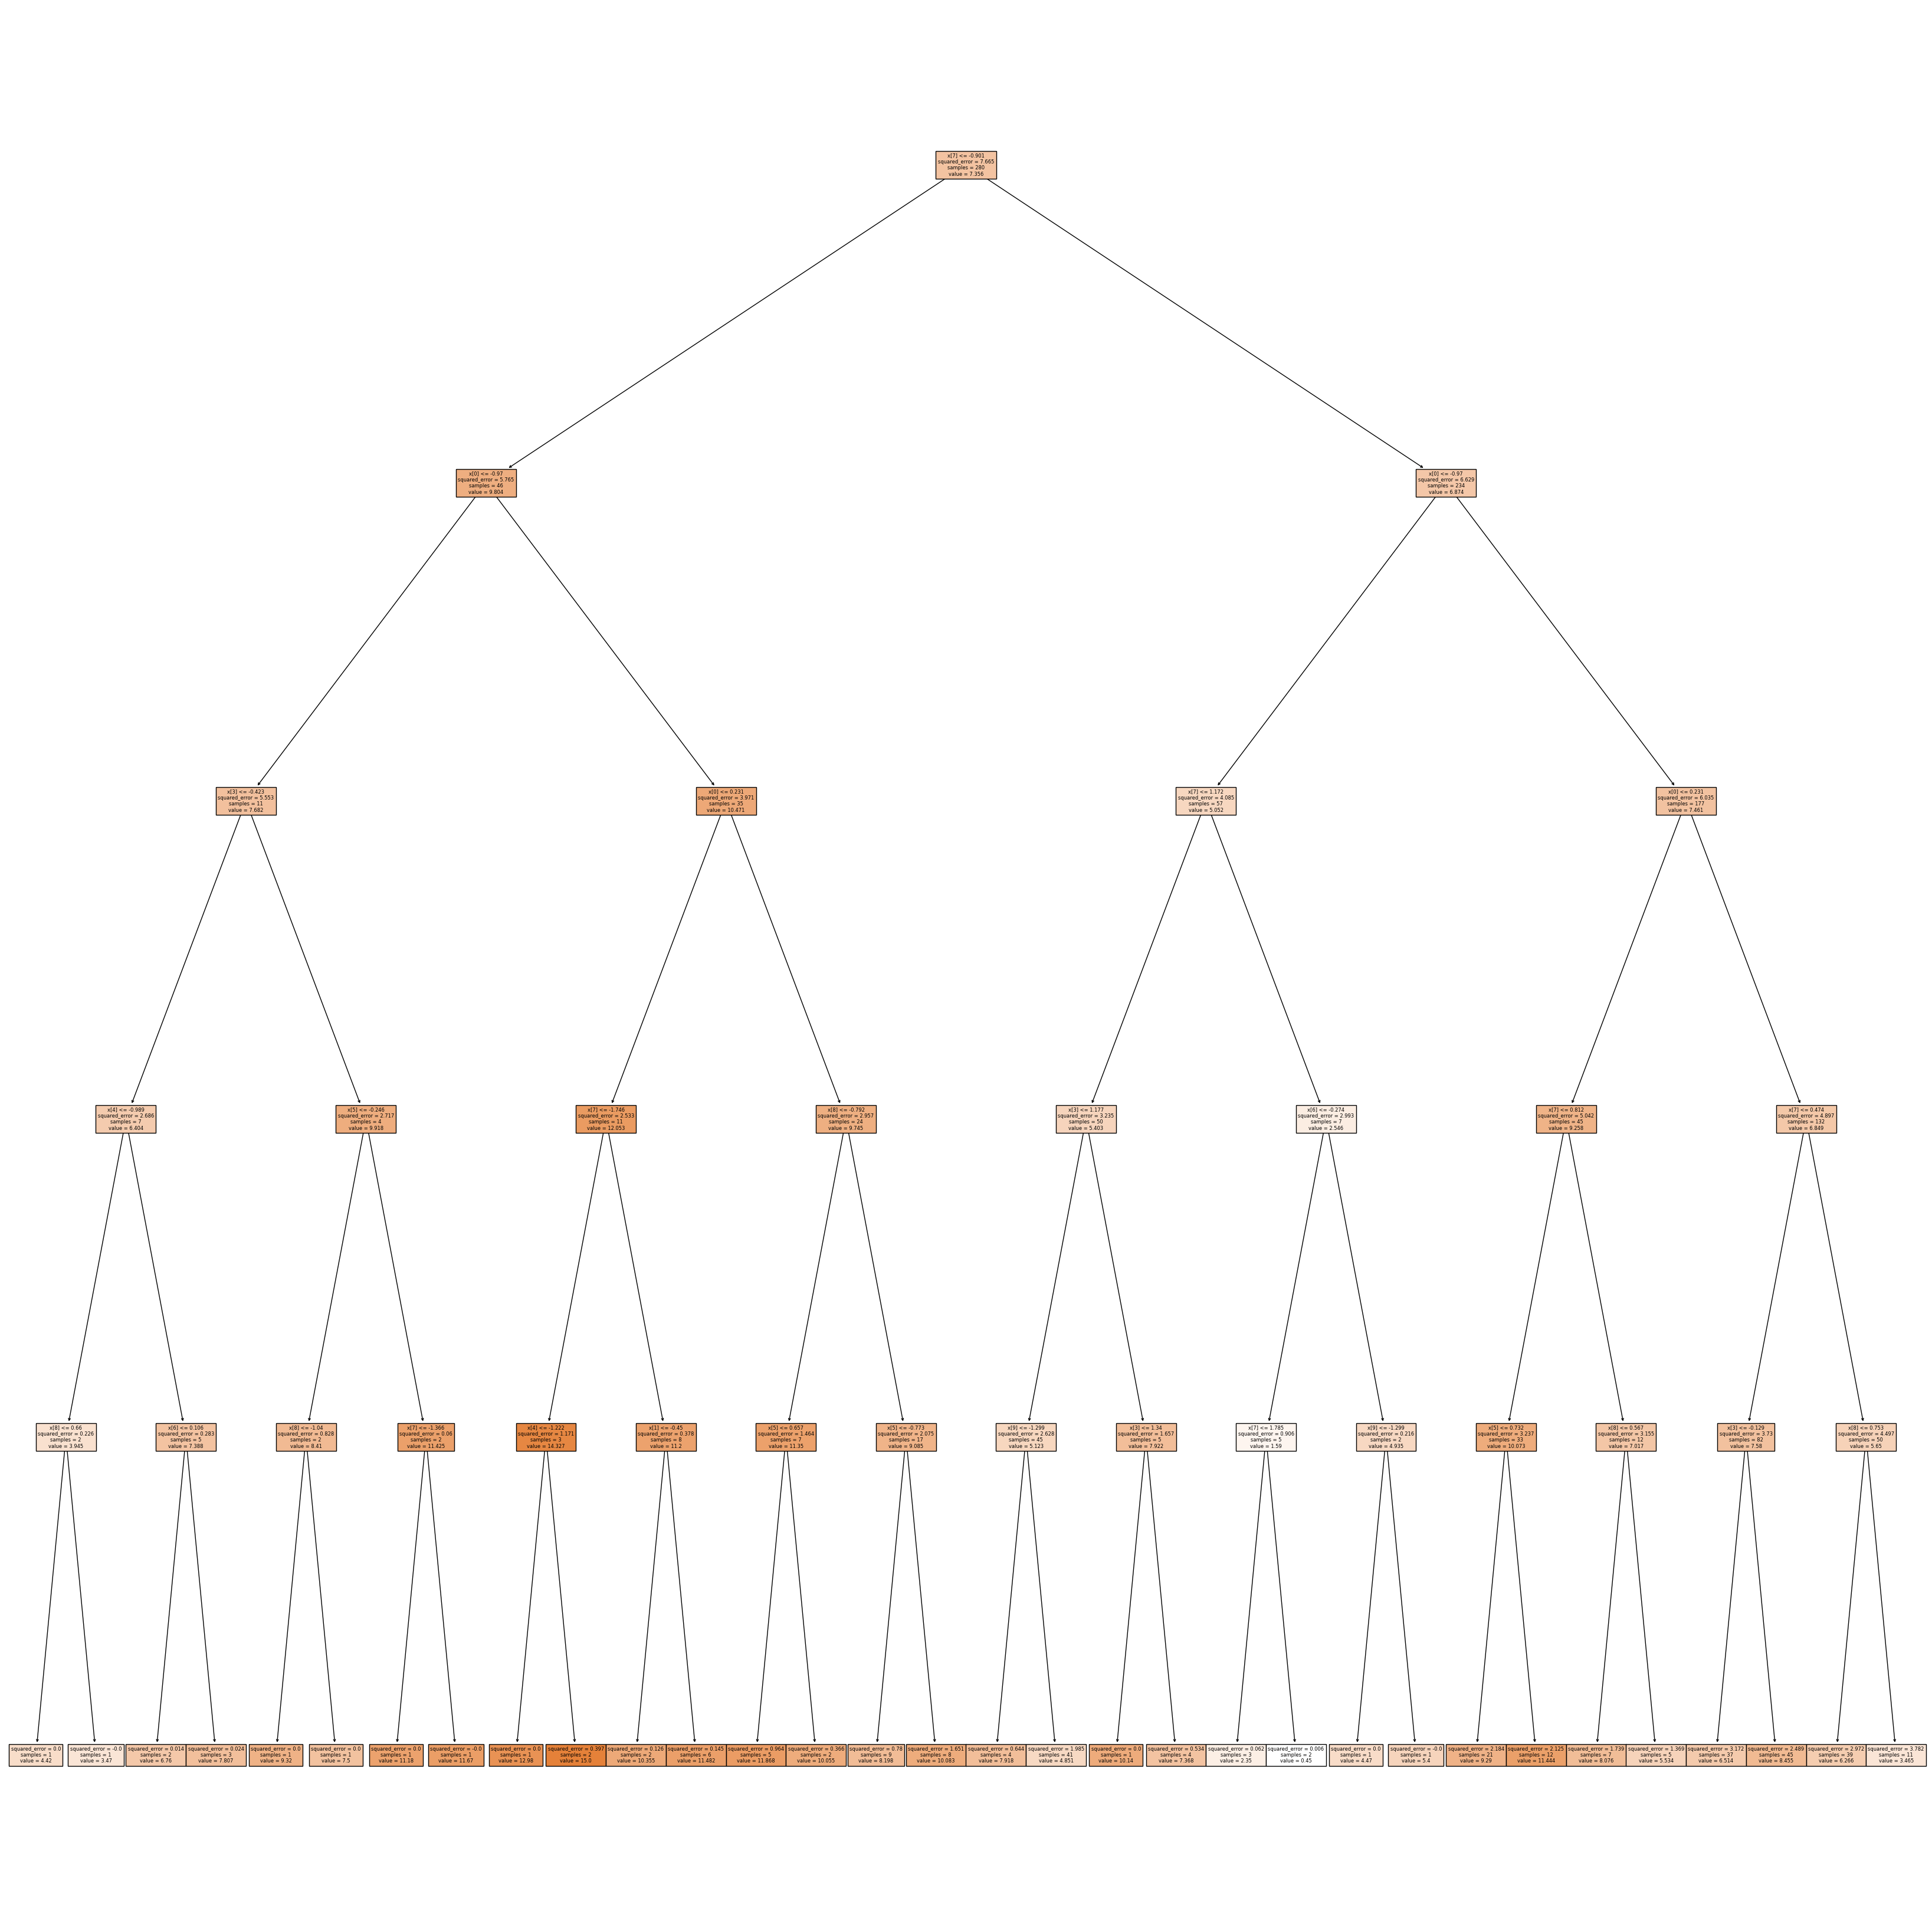

In [36]:
#ploting the graph
plt.figure(figsize=(42,42))
tree.plot_tree(DTR1,filled=True)


In [38]:
Y_pred_train = DTR.predict(X_train)
Y_pred_test = DTR.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Training Error of MAE',mean_absolute_error(Y_pred_train,Y_train).round(2))
print('Testing Error of MAE',mean_absolute_error(Y_pred_test,Y_test).round(2))
print('Training Error of MSE ',np.sqrt(mean_squared_error(Y_pred_train,Y_train)).round(2))
print('Testing Error of MSE',np.sqrt(mean_squared_error(Y_pred_test,Y_test)).round(2))

Training Error of MAE 1.09
Testing Error of MAE 1.81
Training Error of MSE  1.45
Testing Error of MSE 2.23


In [41]:
from sklearn.ensemble import BaggingRegressor
BR = BaggingRegressor(base_estimator = DTR,n_estimators = 700, max_samples = 0.5 ,max_features = 0.8,random_state =42)
BR.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                 max_features=0.8, max_samples=0.5, n_estimators=700,
                 random_state=42)

In [42]:
Y_pred_train = BR.predict(X_train)
Y_pred_test = BR.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Training Error of MAE',mean_absolute_error(Y_pred_train,Y_train).round(2))
print('Testing Error of MAE',mean_absolute_error(Y_pred_test,Y_test).round(2))
print('Training Error of MSE ',np.sqrt(mean_squared_error(Y_pred_train,Y_train)).round(2))
print('Testing Error of MSE',np.sqrt(mean_squared_error(Y_pred_test,Y_test)).round(2))

Training Error of MAE 1.13
Testing Error of MAE 1.49
Training Error of MSE  1.4
Testing Error of MSE 1.9


In [44]:
#cross validation
from sklearn.model_selection import KFold,cross_val_score
K = KFold(15)
Result = cross_val_score(BR,X,Y,cv = K)
print(Result)
print('Mean of the K-Fold',np.mean(Result).round(2))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

[0.52900991 0.54404523 0.68715989 0.45943005 0.48714375 0.66053003
 0.5712877  0.60115057 0.61987996 0.4741383  0.74224272 0.56273243
 0.59305607 0.60693068 0.63180881]
Mean of the K-Fold 0.58
